<a href="https://colab.research.google.com/github/bibekuchiha/The-Data-Science-Workshop/blob/master/Regression/BostonHouseData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the necessary Python modules by entering the following code snippet into a single Colab notebook cell. Press the Shift and Enter keys together to run the block of code:

In [0]:
%matplotlib inline 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.graphics.api as smg 
import pandas as pd 
import numpy as np 
import patsy 
from statsmodels.graphics.correlation import plot_corr 
from sklearn.model_selection import train_test_split 
plt.style.use('seaborn') 

he first line of the preceding code enables matplotlib to display the graphical output of the code in the notebook environment. The lines of code that follow use the import keyword to load various Python modules into our programming environment. This includes patsy, which is a Python module. Some of the modules are given aliases for easy referencing, such as the seaborn module being given the alias sns. Therefore, whenever we refer to seaborn in subsequent code, we use the alias sns. The patsy module is imported without an alias. We, therefore, use the full name of the patsy module in our code where needed.

The plot_corr and train_test_split functions are imported from the statsmodels.graphics.correlation and sklearn.model_selection modules respectively. The last statement is used to set the aesthetic look of the graphs that matplotlib generates to the type displayed by the seaborn module.

2. Next, load the Boston.CSV file and assign the variable name rawBostonData to it by running the following code:

In [0]:
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')

3. Inspect the first five records in the DataFrame:

In [10]:
rawBostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


4. Check for missing values (null values) in the DataFrame and then drop them in order to get a clean dataset:

In [0]:
rawBostonData = rawBostonData.dropna()

5. Check for duplicate records in the DataFrame and then drop them in order to get a clean dataset:

In [0]:
rawBostonData = rawBostonData.drop_duplicates()

6. List the column names of the DataFrame so that you can examine the fields in your dataset, and modify the names, if necessary, to names that are meaningful:

In [13]:
list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

7. Rename the DataFrame columns so that they are meaningful. Be mindful to match the column names exactly as leaving out even white spaces in the name strings will result in an error. For example, this string, ZN, has a white space before and after and it is different from ZN. After renaming, print the head of the new DataFrame as follows:

In [14]:
renamedBostonData = rawBostonData.rename( columns={'CRIM':'crimeRatePerCapita', 
 ' ZN ':'landOver25K_sqft', 
 'INDUS ':'non-retailLandProptn', 
 'CHAS':'riverDummy', 
 'NOX':'nitrixOxide_pp10m', 
 'RM':'AvgNo.RoomsPerDwelling', 
 'AGE':'ProptnOwnerOccupied', 
 'DIS':'weightedDist', 
 'RAD':'radialHighwaysAccess', 
 'TAX':'propTaxRate_per10K', 
 'PTRATIO':'pupilTeacherRatio', 
 'LSTAT':'pctLowerStatus', 
 'MEDV':'medianValue_Ks'}) 
print(renamedBostonData)

     crimeRatePerCapita  landOver25K_sqft  ...  pctLowerStatus  medianValue_Ks
0               0.00632              18.0  ...            4.98            24.0
1               0.02731               0.0  ...            9.14            21.6
2               0.02729               0.0  ...            4.03            34.7
3               0.03237               0.0  ...            2.94            33.4
4               0.06905               0.0  ...            5.33            36.2
..                  ...               ...  ...             ...             ...
501             0.06263               0.0  ...            9.67            22.4
502             0.04527               0.0  ...            9.08            20.6
503             0.06076               0.0  ...            5.64            23.9
504             0.10959               0.0  ...            6.48            22.0
505             0.04741               0.0  ...            7.88            11.9

[506 rows x 13 columns]


8. Inspect the data types of the columns in your DataFrame using the .info() function:

In [15]:
renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25K_sqft        506 non-null    float64
 2   non-retailLandProptn    506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwaysAccess    506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


The output shows that there are 506 rows (Int64Index: 506 entries) in the dataset. There are also 13 columns in total (Data columns). None of the 13 columns has a row with a missing value (all 506 rows are non-null). 10 of the columns have floating-point (decimal) type data and three have integer type data.

9. Now, calculate basic statistics for the numeric columns in the DataFrame:

In [18]:
renamedBostonData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


10. Divide the DataFrame into training and test sets, as shown in the following code snippet:

In [0]:
X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

We choose a test data size of 30%, which is 0.3. The train_test_split function is used to achieve this. We set the seed of the random number generator so that we can obtain a reproducible split each time we run this code. An arbitrary value of 10 is used here. It is good model-building practice to divide a dataset being used to develop a model into at least two parts. One part is used to develop the model and it is called a training set (X_train and y_train combined).

Calculate and plot a correlation matrix for the train_data set:

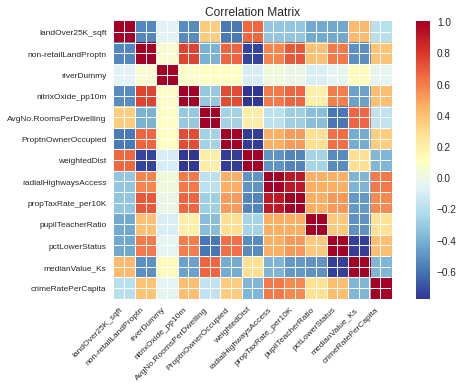

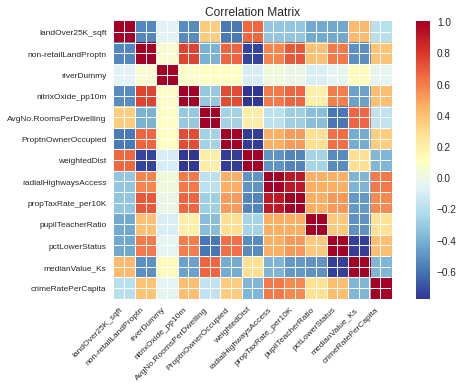

In [21]:
corrMatrix = train_data.corr(method= 'pearson')
xnames = list(train_data.columns)
ynames = list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,title=None,normcolor=False,cmap='RdYlBu_r')

In the preceding heatmap, we can see that there is a strong positive correlation (an increase in one causes an increase in the other) between variables that have orange or red squares. There is a strong negative correlation (an increase in one causes a decrease in the other) between variables with blue squares. There is little or no correlation between variables with pale-colored squares. For example, there appears to be a relatively strong correlation between nitrixOxide_pp10m and non-retailLandProptn, but a low correlation between riverDummy and any other variable.

We can use the findings from the correlation matrix as the starting point for further regression analysis. The heatmap gives us a good overview of relationships in the data and can show us which variables to target in our investigation.